# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [4]:
#seu código aqui
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [5]:
#seu código aqui
# Contagem de valores faltantes
df.isnull().sum()

customerID               0
Genero                  12
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       325
Total_Pago               0
Churn                    5
dtype: int64

In [6]:
# Porcentagem dos valores faltante
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

**Serão excluidas as linhas faltantes das colunas 'Genero' e 'Churn', pois representam uma quantidade/porcentagem pequena no Dataframe, que não impactara significativamento no resultado final do projeto.**

In [7]:
#seu código aqui
df.dropna(subset=['Genero'], inplace=True)
df.dropna(subset=['Churn'], inplace=True)

In [8]:
# Chekagem de valore faltantes da coluna "Genero"
df['Genero'].isnull().sum()

np.int64(0)

In [9]:
# Chekagem de valore faltantes da coluna "Churn"
df['Churn'].isnull().sum()

np.int64(0)

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

In [10]:
# Média da coluna "Pagamento Mensal" 
df['Pagamento_Mensal'].mean()

np.float64(65.60756321839081)

In [11]:
# Mediana da coluna "Pagamento Mensal"
df['Pagamento_Mensal'].median()

71.45

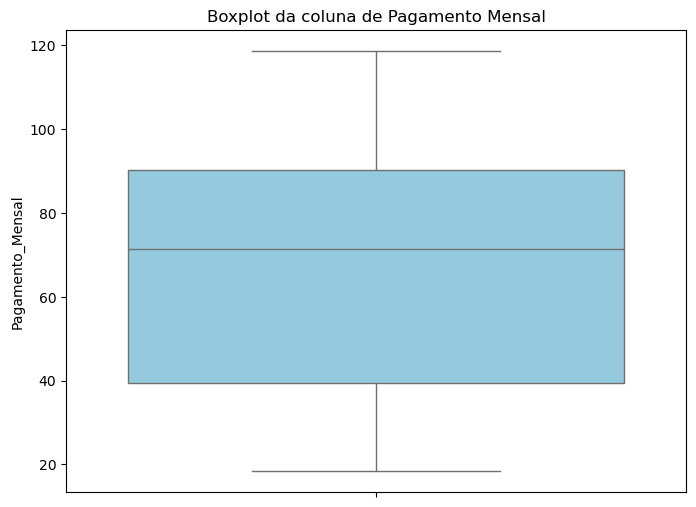

In [12]:
# BoxPlot da coluna "Pagamento Mensal"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da coluna de Pagamento Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show()

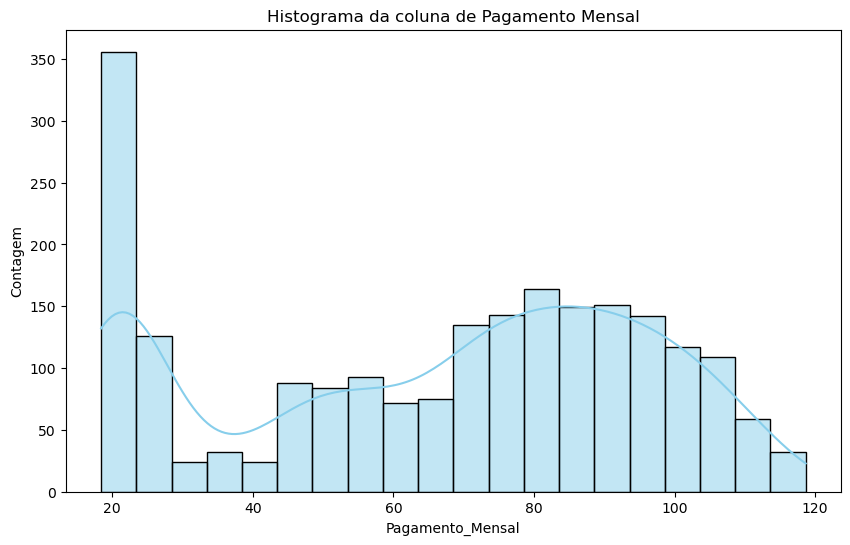

In [67]:
# Histograma da coluna "Pagamento Mensal"
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da coluna de Pagamento Mensal')
plt.xlabel('Pagamento_Mensal')
plt.ylabel('Contagem')
plt.show()

**Conclui-se que a média está sendo negativamento enviesada por valores muito baixos, por isso, optou-se pela utilização da mediana para substituir os valores ausentes.**

In [13]:
#seu código aqui
# Substituição da variável
df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].median(), inplace=True)

C:\Users\nneto\AppData\Local\Temp\ipykernel_11148\2286870523.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].median(), inplace=True)


In [14]:
# Chekagem de valore faltantes da coluna "Pagamento_Mensal"
df['Pagamento_Mensal'].isnull().sum()

np.int64(0)

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [15]:
# Checkagem de dados categoricos da coluna "PhoneService"
df['PhoneService'].value_counts()

PhoneService
Yes    920
No      86
Name: count, dtype: int64

In [16]:
# Filto para visualização de dados faltantes da coluna "PhoneService"
df[df['PhoneService'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
161,0867-MKZVY,Female,0,Yes,No,20,NaN,Fiber optic,Yes,No,No,Month-to-month,Electronic check,71.45,1592.35,Yes
162,4482-EWFMI,Female,0,No,No,2,NaN,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,135.20,No
163,4648-YPBTM,Male,0,No,No,53,NaN,DSL,No,Yes,No,Two year,Bank transfer (automatic),71.45,3958.25,No
164,2907-ILJBN,Female,0,Yes,Yes,11,NaN,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,233.90,No
165,6345-FZOQH,Male,0,Yes,No,69,NaN,No,No internet service,No internet service,No internet service,Two year,Mailed check,71.45,1363.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,8883-ANODQ,Female,0,Yes,Yes,68,NaN,Fiber optic,No,No,No,Two year,Credit card (automatic),84.40,5746.75,No
1639,4690-LLKUA,Male,1,No,No,17,NaN,DSL,No,No,No,Month-to-month,Electronic check,45.05,770.60,Yes
1640,2351-RRBUE,Female,0,Yes,Yes,7,NaN,No,No internet service,No internet service,No internet service,One year,Mailed check,20.65,134.05,No
1641,5980-BDHPY,Male,0,Yes,No,72,NaN,DSL,Yes,Yes,Yes,Two year,Bank transfer (automatic),87.10,6230.10,No


**A porcentegem de dados faltantes na coluna de "PhoneService" é aproximadamente 60%. Como os dados presentes nesta colunas são categoricos, não é viavel a substituição dos dados faltantes, pois podem influenciar de forma exarcebada o resultado final do projeto. Então optou-se por fazer a substituição dos dados faltantes por "Unknown" [Desconhecido], para não perder essa coluna e pode-la analisar futuramente.**

In [17]:
#seu código aqui
# Substituição da variável
df['PhoneService'].fillna("Unknown", inplace=True)

C:\Users\nneto\AppData\Local\Temp\ipykernel_11148\2823649079.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhoneService'].fillna("Unknown", inplace=True)


In [18]:
# Chekagem de valore faltantes da coluna "PhoneService"
df['PhoneService'].isnull().sum()

np.int64(0)

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [19]:
#seu código aqui
# Verificação de variação ortografica em todo o dataframe em formato 'object'
for col in df.select_dtypes(include='object').columns:
    print(f'\nColuna: {col}')
    print(df[col].unique())


Coluna: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']

Coluna: Genero
['Female' 'Male' 'F' 'M' 'f']

Coluna: Casado
['Yes' 'No']

Coluna: Dependents
['No' 'Yes']

Coluna: PhoneService
['No' 'Yes' 'Unknown']

Coluna: Servico_Internet
['DSL' 'No' 'Fiber optic' 'dsl']

Coluna: Servico_Seguranca
['No' 'Yes' 'No internet service']

Coluna: Suporte_Tecnico
['No' 'Yes' 'No internet service']

Coluna: StreamingTV
['No' 'No internet service' 'Yes']

Coluna: Tipo_Contrato
['Month-to-month' 'One year' 'Two year']

Coluna: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Coluna: Churn
['No' 'Yes']


In [20]:
# Substituição de variáveis nas colunas
df['Genero'] = df['Genero'].replace('F', 'Female')
df['Genero'] = df['Genero'].replace('f', 'Female')
df['Genero'] = df['Genero'].replace('M', 'Male')

df['Servico_Internet'] = df['Servico_Internet'].replace('DSL', 'Dsl')
df['Servico_Internet'] = df['Servico_Internet'].replace('dsl', 'Dsl')

df['Servico_Seguranca'] = df['Servico_Seguranca'].replace('No internet service', 'No')

df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace('No internet service', 'No')

df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')

In [21]:
# Verificação após alterações
for col in df.select_dtypes(include='object').columns:
    print(f'\nColuna: {col}')
    print(df[col].unique())


Coluna: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']

Coluna: Genero
['Female' 'Male']

Coluna: Casado
['Yes' 'No']

Coluna: Dependents
['No' 'Yes']

Coluna: PhoneService
['No' 'Yes' 'Unknown']

Coluna: Servico_Internet
['Dsl' 'No' 'Fiber optic']

Coluna: Servico_Seguranca
['No' 'Yes']

Coluna: Suporte_Tecnico
['No' 'Yes']

Coluna: StreamingTV
['No' 'Yes']

Coluna: Tipo_Contrato
['Month-to-month' 'One year' 'Two year']

Coluna: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Coluna: Churn
['No' 'Yes']


# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [22]:
#seu código aqui
# Renomeando colunas
df.rename(columns={'customerID': 'Customer_ID'}, inplace=True)
df.rename(columns={'Genero': 'Gender'}, inplace=True)
df.rename(columns={'Idoso': 'Elderly'}, inplace=True)
df.rename(columns={'Casado': 'Married'}, inplace=True)
df.rename(columns={'Tempo_como_Cliente': 'Time_as_Customer'}, inplace=True)
df.rename(columns={'PhoneService': 'Phone_Service'}, inplace=True)
df.rename(columns={'Servico_Internet': 'Internet_Service'}, inplace=True)
df.rename(columns={'Servico_Seguranca': 'Security_Service'}, inplace=True)
df.rename(columns={'Suporte_Tecnico': 'Technical_Support'}, inplace=True)
df.rename(columns={'StreamingTV': 'Streaming_TV'}, inplace=True)
df.rename(columns={'Tipo_Contrato': 'Contract_Type'}, inplace=True)
df.rename(columns={'PaymentMethod': 'Payment_Method'}, inplace=True)
df.rename(columns={'Pagamento_Mensal': 'Monthly_Payment'}, inplace=True)
df.rename(columns={'Total_Pago': 'Total_Paid'}, inplace=True)
df.head(10)

,Customer_ID,Gender,Elderly,Married,Dependents,Time_as_Customer,Phone_Service,Internet_Service,Security_Service,Technical_Support,Streaming_TV,Contract_Type,Payment_Method,Monthly_Payment,Total_Paid,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Dsl,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,Dsl,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Dsl,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,Dsl,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No,No,One year,Mailed check,71.45,1022.95,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),71.45,7382.25,No
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,Dsl,No,Yes,No,Month-to-month,Credit card (automatic),71.45,528.35,Yes
19,4183-MYFRB,Female,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,1862.90,No
20,8779-QRDMV,Male,1,No,No,1,No,Dsl,No,No,No,Month-to-month,Electronic check,71.45,39.65,Yes
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No,No,One year,Bank transfer (automatic),71.45,202.25,No
